# Detecting Colon Cancer Using a Convolutional Neural Network (CNN)

### Notebook Overview
Goal: Build a deep learning model using a Convolutional Neural Netowrk (CNN) to classify histopathological images of colon tissue as cancerous or non-cancerous.

Dataset: [Lung and Colon Cancer Histopathological Images (Kaggle)](https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images)

Output: A trained CNN model capable of accurately predicting new histopathologiical images as cancerous or non-cancerous.

Evaluation Metrics: Accuracy, Confusion Matrix

### Project Configuration

In [1]:
# import libraries

import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

### Data Loading & Preprocessing

In [2]:
# function: load data from file

def load_images_from_path(path, label):
    images, labels = [], []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file),
                               target_size=(224, 224))
        images.append(image.img_to_array(img))
        labels.append((label))

    return images, labels

In [3]:
# function: show images

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20),
                             subplot_kw={'xticks': [],
                                         'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

In [4]:
# prepare for training/testing

x_train, y_train, x_test, y_test = [], [], [], []

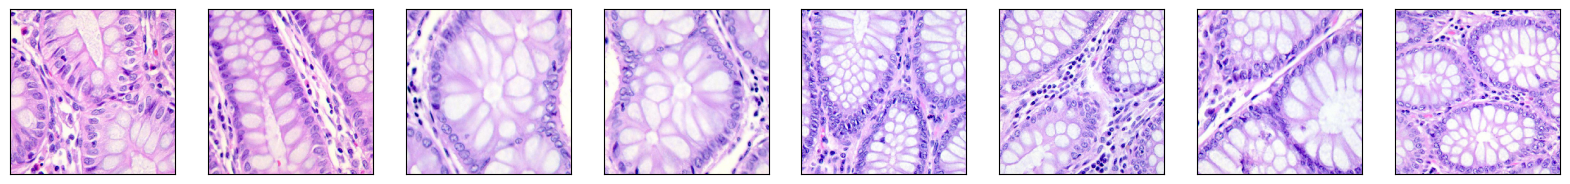

In [5]:
# load non-cancerous images, label as 0, and add to training sets

images, labels = load_images_from_path('data/processed/colon_n_train', 0)
show_images(images)

x_train += images
y_train += labels

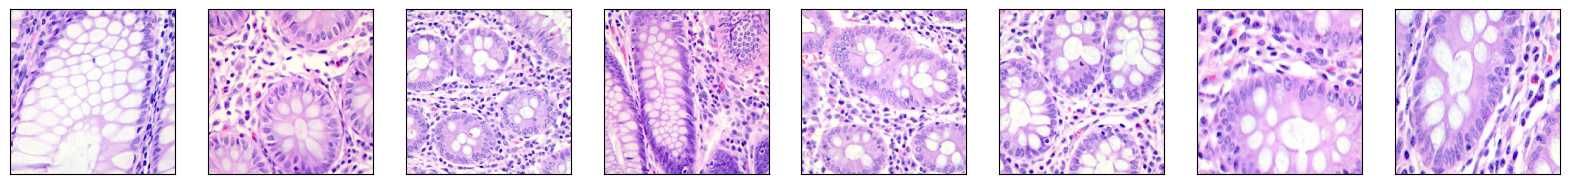

In [6]:
# load non-cancerous images, label as 0, and add to testing sets

images, labels = load_images_from_path('data/processed/colon_n_test', 0)
show_images(images)

x_test += images
y_test += labels

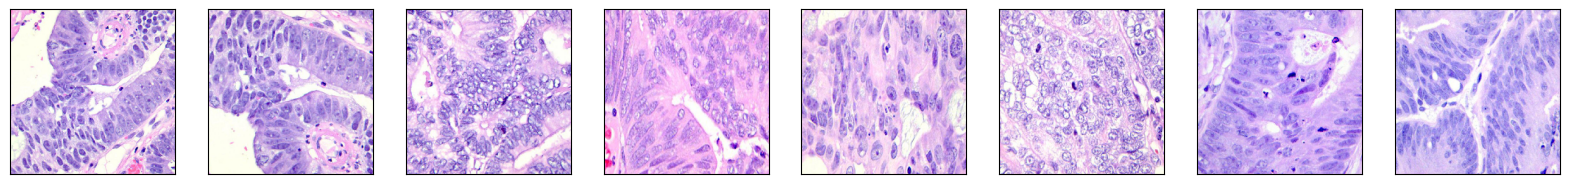

In [7]:
# load cancerous images, label as 1, and add to training sets

images, labels = load_images_from_path('data/processed/colon_aca_train', 1)
show_images(images)

x_train += images
y_train += labels

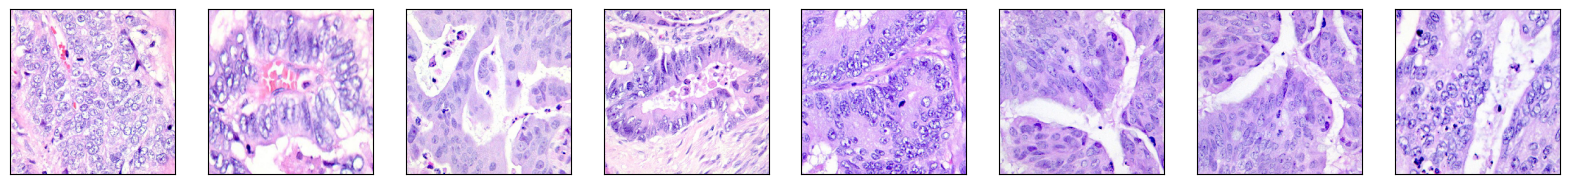

In [8]:
# load cancerous images, label as 1, and add to testing sets

images, labels = load_images_from_path('data/processed/colon_aca_test', 1)
show_images(images)

x_test += images
y_test += labels

In [9]:
# normalize images

x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

y_train = np.array(y_train)
y_test = np.array(y_test)

### Model Construction

In [10]:
# build CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Input(shape=(224, 224, 3)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# compile and summarize the model

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,031,521 (7.75 MB)

 Trainable params: 2,031,521 (7.75 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [ ]:
# fit model

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 batch_size=32, epochs=20, shuffle=True)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 246ms/step - accuracy: 0.5035 - loss: 0.7012 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.5048 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.4876 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 243ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 243ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 242ms/step - accuracy: 0.5026 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 242ms/step - accuracy: 0.4944 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 241ms/step - accuracy: 0.4989 - loss: 0

### Model Evaluation

In [ ]:
# visualize accuracy

import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('CNN Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
plt.savefig('outputs/CNN Training and Validation Accuracy.png')

In [ ]:
#predictions for confusion matrix to allow adjusting figure

y_predicted = model.predict(x_test) > 0.5

In [ ]:
# confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()

labels = ['Not Cancerous', 'Cancerous']

fig, ax = plt.subplots(figsize=(4, 4))
ax.grid(False)

cmd.from_predictions(y_test, y_predicted,
                     display_labels=labels, 
                     colorbar=False,
                     cmap='Blues', xticks_rotation='vertical', ax=ax)

plt.title('CNN Confusion Matrix')
plt.tight_layout()
plt.savefig('outputs/CNN Confusion Matrix.png')

### Model Exporting

In [ ]:
# save model

model.save('models/CNN.keras')